# 1.1 Статистический критерий


ϵ ~ распределение Бернули(μ) (0...1)

$ϵ_1,ϵ_2,...,ϵ_3$
</br></br>
<b> Шаг 1: Гипотеза</b>
```
Н0: μ=50%
Н1: μ>50%
```
<b> Шаг 2: Придумываем статистику</b> </br>
$Q = \sum{\mu_i}$ ~ Binom(30, 0.5) </br>

<b> Шаг 3: Формируем критерий </b> </br>
```
if Q >= 21:
    reject H0
else:
    not reject H0
Строим функцию вероятности (частотный график)
```
<b> Шаг 4: Статистическая значимость критерия ($\alpha$)</b>

$FPR$ - ложноположительное срабатывание (вероятность ошибиться положительно)

$FPR <= \alpha (5\%) $

<b> Строгое математическое правило </b>, которое отвергает либо не отвергает Н0, при чем его $FPR <= \alpha$




# 1.2 Создаем статистический критерий
В этой части посмотрим, как вывести то, что мы получили в части 2, с помощью Python. А также пооймем, как найти подходящее С с помощью Python.
## Биноминальное распределение
Мы выяснили, что статистика Q имеет биноминальное распределение.
Баноминальное распределение Binom(n, μ) - распределение количества успехов в
последовательности из n независимых случайных экспериментов, вероятность успеха в каждом из которых равна μ.
Чтобы работать с распределением, можно создать объект-распределение с помощью библиотеки scipy.stats.


In [34]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [35]:
binom_h0 = binom(
    n=30, # количество испытаний
    p=0.5 # вероятность успеха
)

## Функция вероятности
Функция вероятности дискретного распределения p_e(x) - вероятность, с которой е принимает значение х.

В Python это функция `pmf` (probability mass function)


In [36]:
print(binom_h0.pmf(20))

0.027981600724160775


Изобразим распределение статистики Q при справедливости Н0 на графике. Для этого можно передать сразу массив точек, для которых надо рассчитать вероятность.

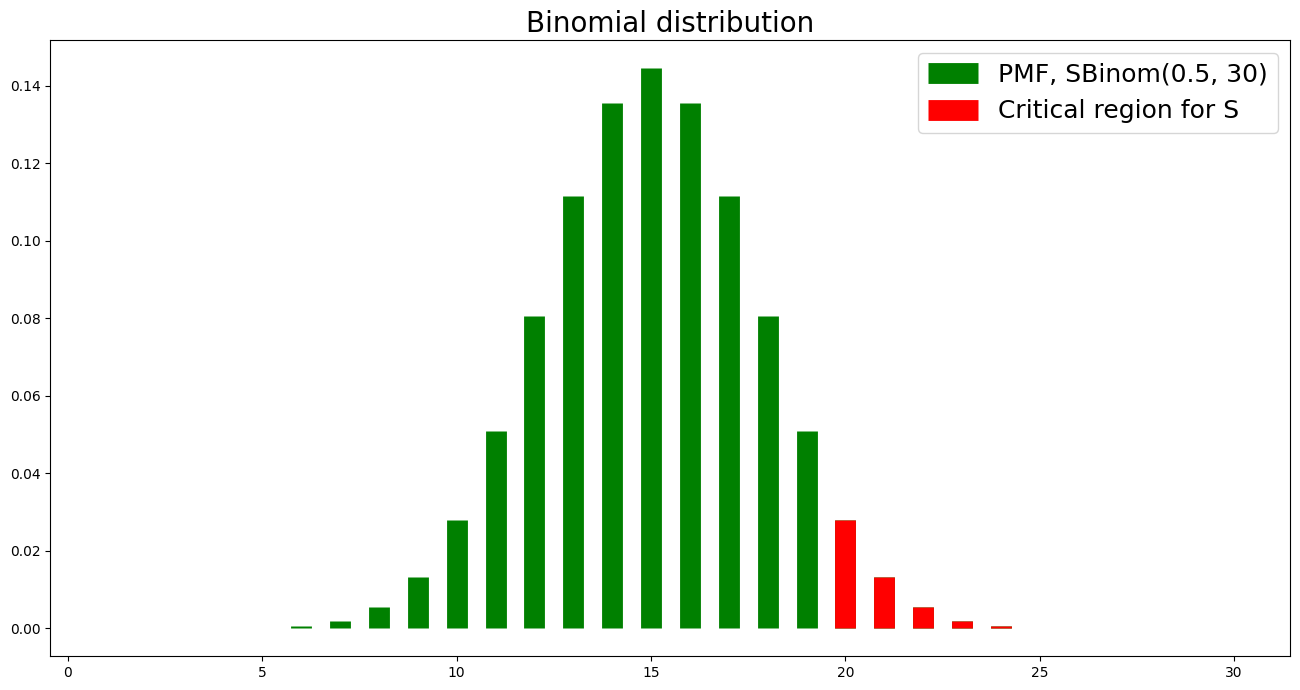

In [37]:
# координата
x_grid = np.arange(1, 31)
# высота столбцов на графике
probs = binom_h0.pmf(x_grid)

plt.figure(figsize=(16, 8))
# строим вертикальные столбцы от 0 до вероятности
plt.vlines(x_grid, 0, probs, linewidth=15.0, color='green', label='PMF, SBinom(0.5, 30)')
# отдельно изобразим критическую область критерия
crit_reg = x_grid >= 20
plt.vlines(x_grid[crit_reg], 0, probs[crit_reg], linewidth=15., color='red', label='Critical region for S')

plt.title('Binomial distribution', fontsize=20)
plt.legend(fontsize=18)
plt.show()

На самом деле уже сейчас мы можем посчитать, какая вероятность попадания в критическую область. Нужно просто просуммировать высоты красных столбцов.

In [38]:
print(np.sum(probs[crit_reg]))

0.049368573352694636


Получаем то число, которые было в предыдущей части. Значит мы действительно построили критерий уровня значимости $\alpha$ = 0.05. Более того, это критерий уровня значимости 0.0494, но такую точность обычно не используют.

А что было бы если мы взяли С=19?

In [39]:
crit_reg = x_grid >= 19
print(np.sum(probs[crit_reg]))

0.10024421103298672


Тогда вероятность ошибки уже даже больше 10%, что совсем нам не подходит. Видно, что нет такого С, чтобы False Positive Rate было ровно 5%.

## Комулятивная функция распределения
Комулятивная функция распределения $F_\epsilon(x) = P(\epsilon <= x)$

В Python это функция cdf (comulative distribution function)

In [40]:
print(binom_h0.cdf(19))

0.9506314266473055


По строчке выше понятно, что вероятность получить 19 или меньше успехов в нашей задаче >= 0.95. А поскольку $P(\epsilon<=19) + P(\epsilon>=20) = 1$, можем вычислить уровень значимости нашего критерия.

In [41]:
print(1-binom_h0.cdf(19))

0.04936857335269451


## Квантиль
Чтобы выбрать критическую область для критерия, мы хотели бы найти точку, площадь столбцов справа от которой была бы 5%. То есть площадь столбцов слева - 95%. Такая точка называется квантилью.

$u_p(\epsilon) = \{x|F_\epsilon(x)=p\}$

Но при p=0.95 и нашем биноминальном распределении, такой точки нет. Мы выяснили, что есть точка, справа от которой площадь 0.494, а у следующей уже 0.1. Чтобы определить квантиль в этом случае, модифицируем определение:

Квантиль $Quantile_0(\epsilon) = u_p(\epsilon) = min\{x|F_\epsilon(x)>=p\}$ - величина, которую $\epsilon$ не превышает с вероятностью хотя бы p.

<b> Пример: </b>

Для величины $\epsilon -> Bin(30, 0.5)$ посчитаем 0.95-квантиль. Решим задачу просто подбором.

$P(\epsilon<=18) ≈ 0.90$\
$P(\epsilon<=19) ≈ 0.951$\
$P(\epsilon<=20) ≈ 0.97$

Видим, что 18 нам еще не подходит, а 19 и большие значения уже подойдут. В них функция распределения будет больше р. Ответ - наименьшее подходящее значение, то есть 19. При этом нет точки, где функция распределения была бы равна р в точности.

Если бы распределение было непрерывное, можно было бы сказать, что квантиль - такое х, на котором функция распределения равна р. Но в прошлом пункте увидели, что для дискретного распределения такого может не быть.

В Python квантиль можно посчитать через функцию ppf (percent point function)

In [42]:
print(binom_h0.ppf(0.95))

19.0


Как теперь подобрать С для любых n, $\mu$ и для любого уровня значимости $\alpha$?
1. Требуется найти С, такое, что $Р(Q>=C) <= \alpha$
2. То есть требуется $P(Q<C) >= 1-\alpha$
3. Q принимает только целые значения: $P(Q<=C-1)>=1-\alpha$, или $F(C-1) >= 1- \alpha$
4. Значит, из определения квантили, $C-1=u_{1-\alpha}$
5. Значит $C=u_{1-\alpha}+1$

In [43]:
def make_binom_criterion(n, mu=0.5, alpha=0.5):
    '''
    Строим критерий для задачи с доставкой
    Параметры:
        n: кол-во доставок в эксперименте
        mu: вероятность успеха в нулевой гипотезе
        alpha: уровень значимости критерия

    Возвращает:
        C для критерия S = {Q >= C}
    '''
    binom_h0 = binom(n=n, p=mu)
    q = binom_h0.ppf(1-alpha)
    return q + 1

Применим к нашей постановке

In [44]:
print(f'if Q >=', make_binom_criterion(
    30,0.5,0.05
), 'then reject H0')

if Q >= 20.0 then reject H0


Критическое значение 20, значит итоговый критерий выглядит так:

$S = \{Q >= 20\}$

Q = 19, значит гипотезу мы не отвергаем.

При этом нам удалось построить процесс, по которому мы принимаем решение для любого уровня значимости и значения статистики критерия.

# 1.3 Статический критерий уровня статзначимости $\alpha$

n = 30\
H0: $\mu = 0.5$\
H1: $\mu > 0.5$\
$\alpha = 0.05$\

Отсюда можем найти стат критерий:
```
if q >= 20:
    reject H0
```





## p-value
$ p-value(q) = P_H0(Q>=q)$

q - некое наблюдаемое значение

$p-value(17) = 1 - cdf(16)$

Следовательно,

$P>\alpha ≡ q$ - вне критической области ≡ not reject H0

$PБ=\alpha ≡ q$ - в критической области ≡ reject H0

Тогда:

```
if p-value <= α:
    reject H0
```
Заметим, что для вычисления p-value не понадобилось знание $\alpha$, а нужна была только статистика и форма критерия.


In [45]:
def pvalue_binom(n, mu, q):
    '''
    Считает pvalue для задачи с доставкой
    Параметры:
        n: кол-во доставок в эксперименте
        mu: вероятность успеха в нулевой гипотезе
        q: количество успешных доставок

    Возвращает:
        p-value для критерия S = {|Q - 15| >= C}
    '''
    binom_h0 = binom(n=n, p=mu)
    return 1 - binom_h0.cdf(q - 1)

print(f'if {pvalue_binom(n=30, mu=0.5, q=17):0.4} <= alpha, \n then reject H0')

if 0.2923 <= alpha, 
 then reject H0


# 1.4 Двусторонний критерий

H0: $\mu=0.5$

H1: $\mu!=0.5$

$\alpha=0.05$

Тогда и слева и справа по $\alpha/2$
```
if q<=9 or q>=21:
    reject H0
```

## Случай с несимметричным распределением

Когда распределение при справледивости Р0 несимметрично, отклонения от ожидаемого значения в разные стороны могут быть по-разному критичны. В качестве примера рассмотрим также биноминальное распределение, но с вероятностью успеха 0.8.

Тогда можно левую и правую критические области построить отдельно, выделив на них по $\alpha/2$ площади. Правую область мы уже умеем искать, найдем левую.

In [46]:
binom_h0_nonsym = binom(
    n=30, # количество испытаний
    p=0.8 # вероятность успеха
)

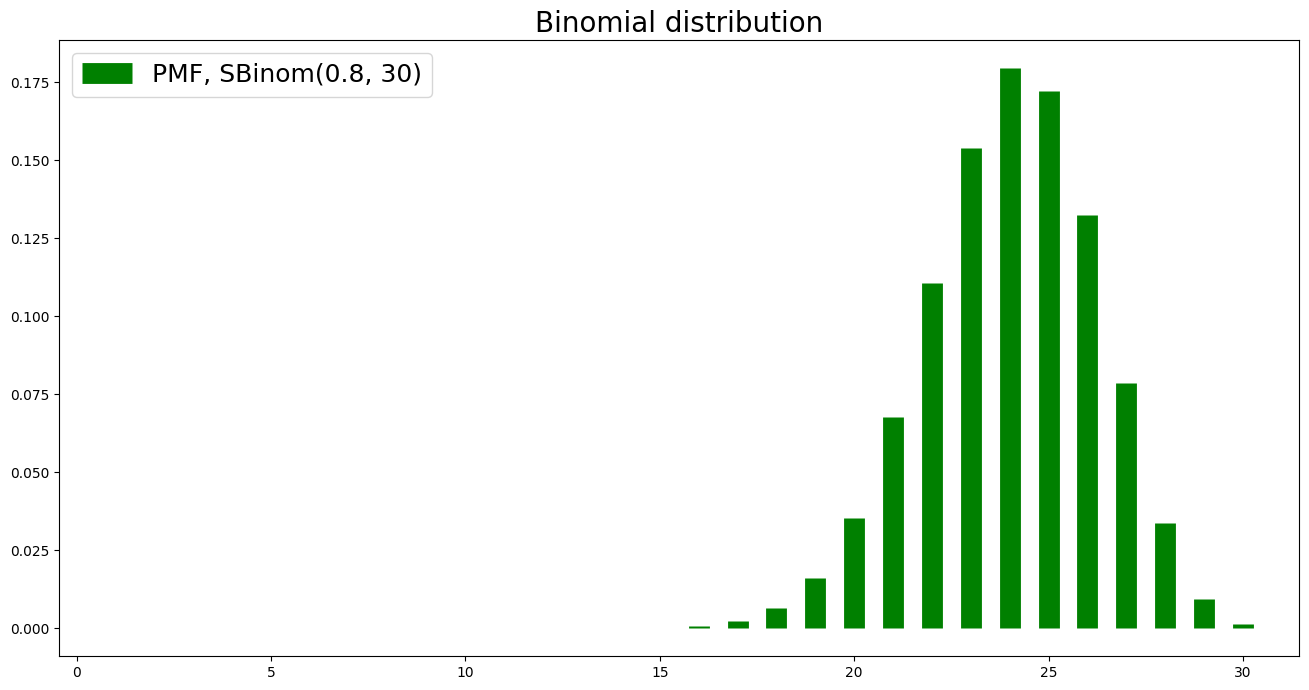

In [59]:
# координата
x_grid = np.arange(1, 31)
# высота столбцов на графике
probs = binom_h0_nonsym.pmf(x_grid)

plt.figure(figsize=(16, 8))
# строим вертикальные столбцы от 0 до вероятности
plt.vlines(x_grid, 0, probs, linewidth=15.0, color='green', label='PMF, SBinom(0.8, 30)')
# отдельно изобразим критическую область критерия

plt.title('Binomial distribution', fontsize=20)
plt.legend(fontsize=18, loc='upper left')
plt.show()

Для того, чтобы построить двусторонный критерий, нужно найти слева и справа области, площадь которых составляет не больше, чем $\alpha/2$. Для правой стороны мы уже решаи такую задачу, решим для левой.

ищем С, такое

$P(Q(\epsilon)<=C) <=\alpha/2$

Сначала найдем первое число, где вероятность $>=\alpha/2$. А это по определению $\alpha/2$-квантиль. Достаточно взять предыдущее число, и оно будет удовлетворять нашему условию.

In [53]:
def two_sided_criterion_nonsym(n, mu, alpha):
    binom_h0 = binom(n=n, p=mu)
    c2 = binom_h0.ppf(1 - alpha/2) + 1
    c1 = binom_h0.ppf(alpha/2) - 1
    return c1, c2

In [54]:
c1, c2 = two_sided_criterion_nonsym(30, 0.8, 0.05)

In [55]:
print(c1, c2)

18.0 29.0


Значит наш критерий для проверки гипотезы

$H_0: \mu = 0.8$

$H_1: \mu ≠ 0.8$

имеет вид

$S=\{Q(\epsilon)<=18\}$ U $S=\{Q(\epsilon)>=29\}$

Здесь граница 29 уже выглядит логично, потому что надо опровергать 80% орлов/успехов, а для этого требуется большое их количество.

Изобразим критическую область на графике.

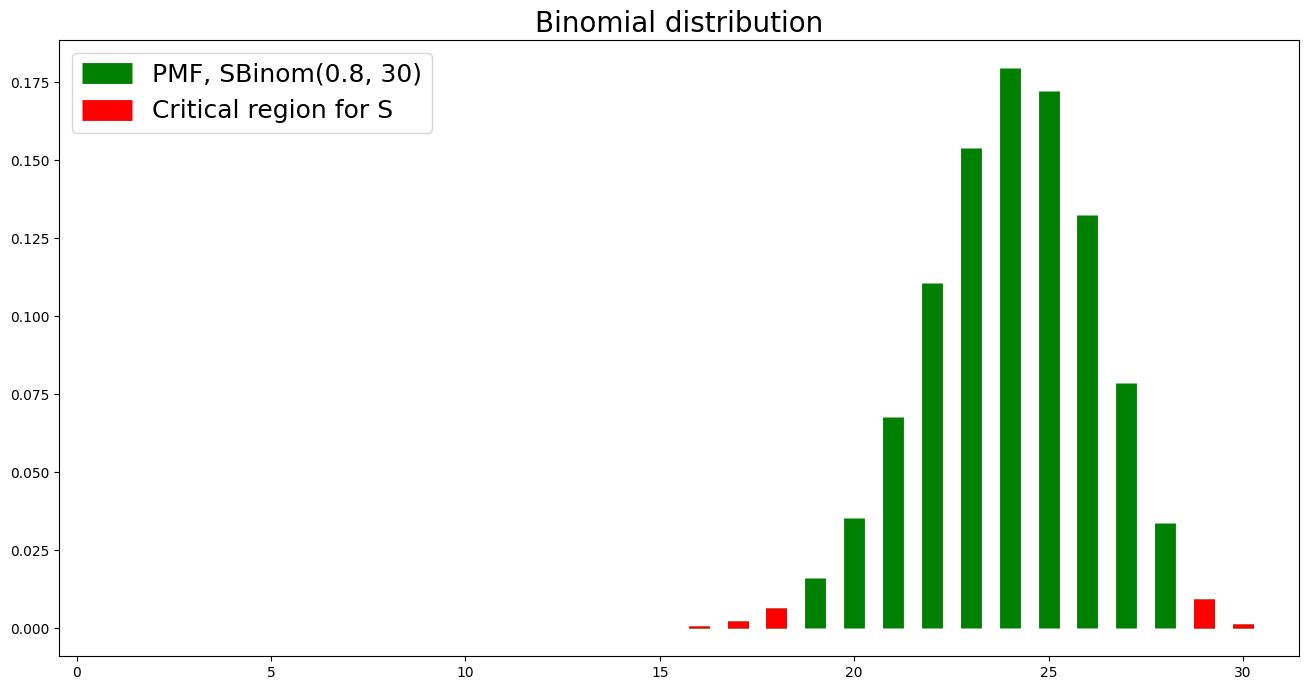

In [58]:
plt.figure(figsize=(16, 8))

probs = binom_h0_nonsym.pmf(x_grid)
plt.vlines(x_grid, 0, probs, linewidth=15.0, color='green', label='PMF, SBinom(0.8, 30)')
crit_reg = (x_grid <= c1) | (x_grid >= c2)
plt.vlines(x_grid[crit_reg], 0, probs[crit_reg], linewidth=15., color='red', label='Critical region for S')
plt.title('Binomial distribution', fontsize=20)
plt.legend(fontsize=18, loc='upper left')
plt.show()

## p-value для несимметричного распределения

Этот критерий - объединение двух критериев уровня значимости $\alpha/2$, для каждого из которых можно посчитать p-value. Обозначим их как p1, p2. Первый критерий отвергается при $p_1<=\alpha/2$, $ \ p_2<=\alpha/2$. А наш объединенный, когда выполнено одно из этих условий, то есть

$2p_1<=\alpha/2 ∨ 2p_2<=\alpha <=> 2 min(p_1, p_2) <= \alpha$

Значит можно считать pvalue как 2 min(p1, p2) и сравнить c $\alpha$

проведем аналогию с симметричным случаем: если сумма оказалась в левой части, то нужно посчитать P-value левого критерия и умножить на 2. Если сумма оказалась в правой части, то нжуно посчитать p-value правого критерия и умножить на 2.



In [67]:
def pvalue_two_sided(n, mu, q):
    '''
    Считает pvalue для двусторонней альтернативы в задаче с доставкой
    Параметры:
        n: кол-во доставок в эксперименте
        mu: вероятность успеха в нулевой гипотезе
        q: количество успешных доставок

    Возвращает:
        p-value для двустороннего критерия
    '''
    binom_h0 = binom(n=n, p=mu)
    p1 = binom_h0.cdf(q - 1)
    p2 = 1 - binom_h0.cdf(q-1)
    return 2 * min(p1, p2, 0.5)

Посчитаем p-value для q=28

In [68]:
print(f'{pvalue_two_sided(n=30, mu=0.8, q=28):0.4}')

0.08836


Видно, что p-value > 0.05, значит на уровне значимости 0.05 даже 28 успехов недостаточно, чтобы отвергнуть вероятность успеха в 80%.

Заметим, что эта же функция работает и для симметричного случая, возвращая тот же результат.